In [1]:
import os
from sys import stdout

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
from math import sqrt
from scipy.signal import savgol_filter
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import cross_val_predict

import warnings
warnings.filterwarnings('ignore')

In [2]:
x_df = pd.read_csv('avg_intesities_data.csv', sep = ',')
values = x_df.values
#wl=x_df.columns.values
#print(wl.shape)

#print(values)
#print(type(values))
print(values.shape)
print(values[1].shape)
print(len(values))
x_df

(28, 2046)
(2046,)
28


,173.738600,173.868800,173.999000,174.129100,174.259300,174.389500,174.519700,174.649900,174.780100,174.910300,...,428.718100,428.828600,428.939000,429.049500,429.159900,429.270300,429.380600,429.491000,429.601300,429.711600
0,2738.206897,2668.275862,2741.172414,2752.275862,2778.482759,2754.482759,2769.103448,2748.862069,2812.137931,2703.241379,...,4863.862069,5023.172414,5530.137931,5345.758621,4940.413793,4802.310345,4708.000000,4667.620690,4657.827586,4683.724138
1,2659.481481,2592.703704,2654.148148,2670.888889,2708.055556,2672.703704,2684.092593,2669.166667,2723.166667,2625.333333,...,4047.129630,3970.648148,3998.148148,3988.333333,4000.462963,3993.925926,3921.648148,3900.092593,3879.481481,3910.000000
2,2964.823529,2885.352941,2964.470588,2970.529412,3005.235294,2973.000000,2996.529412,2972.294118,3026.235294,2936.176471,...,5695.823529,5598.823529,5558.352941,5568.117647,5607.529412,5631.588235,5559.705882,5543.235294,5514.823529,5527.941176
3,2907.888889,2839.555556,2892.333333,2914.777778,2943.222222,2921.888889,2925.333333,2915.333333,2967.000000,2868.000000,...,5576.000000,5489.000000,5467.777778,5438.000000,5502.333333,5495.000000,5441.111111,5418.000000,5394.888889,5394.333333
4,2717.125000,2649.375000,2715.750000,2735.312500,2760.562500,2744.625000,2741.875000,2722.250000,2784.625000,2680.125000,...,4495.875000,4395.562500,4364.750000,4367.375000,4430.250000,4436.375000,4384.125000,4345.625000,4316.375000,4341.437500
5,3238.800000,3166.850000,3234.850000,3251.550000,3295.250000,3262.600000,3288.100000,3266.400000,3315.750000,3217.500000,...,6823.500000,6737.750000,6756.400000,6726.550000,6748.850000,6718.150000,6653.050000,6629.000000,6625.350000,6629.100000
6,2847.607143,2778.785714,2842.392857,2857.250000,2898.500000,2868.107143,2877.178571,2860.428571,2916.500000,2827.178571,...,4992.035714,4928.214286,4944.571429,4932.535714,4956.607143,4935.428571,4869.357143,4849.000000,4823.464286,4843.071429
7,2724.160000,2647.600000,2714.720000,2725.960000,2759.360000,2728.480000,2747.600000,2726.040000,2778.040000,2682.280000,...,4453.560000,4357.720000,4329.880000,4342.040000,4392.960000,4402.040000,4335.240000,4315.640000,4299.680000,4315.920000
8,2960.090909,2898.000000,2972.636364,2980.909091,3013.818182,2987.272727,2994.000000,2988.272727,3035.272727,2953.000000,...,5782.454545,5711.272727,5634.363636,5656.454545,5711.545455,5704.545455,5647.181818,5633.636364,5595.272727,5606.818182
9,3095.000000,3026.024390,3094.609756,3102.634146,3155.853659,3118.243902,3137.048780,3127.756098,3178.097561,3082.365854,...,5990.097561,5897.707317,5853.756098,5856.658537,5901.048780,5913.731707,5832.390244,5800.024390,5771.097561,5792.341463


In [3]:
"""#This is just for visualizing the various plots of the samples

df = pd.read_csv('./data/040_A07_Zanardi_QS277us_200Hz_delay1us_exp1ms', sep = '\t')
df1=df.drop(columns=['Pixels'])
df1=df1.dropna(axis=1)
data=df1.values
wl= data[0]
print(wl)

for i in range(len(values)):
    plt.plot(wl, values[i])
    #plt.show() #comment this one to have unique plot instead of multiple ones
#range(len(dfs))
"""



"#This is just for visualizing the various plots of the samples\n\ndf = pd.read_csv('./data/040_A07_Zanardi_QS277us_200Hz_delay1us_exp1ms', sep = '\t')\ndf1=df.drop(columns=['Pixels'])\ndf1=df1.dropna(axis=1)\ndata=df1.values\nwl= data[0]\nprint(wl)\n\nfor i in range(len(values)):\n    plt.plot(wl, values[i])\n    #plt.show() #comment this one to have unique plot instead of multiple ones\n#range(len(dfs))\n"

In [4]:
df_y = pd.read_csv('concentration.csv', sep = ',')
print(type(df_y))
concentration=df_y.values
print(concentration.shape)
#print(concentration)
df_y

<class 'pandas.core.frame.DataFrame'>
(28, 9)


,Reference Number,Si,Fe,Mg,Cu,Zn,Mn,Al,Total
0,1,0.185,0.228,2.940,0.0304,0.0620,0.280,96.0000,99.7254
1,2,0.360,0.600,1.100,0.0700,0.2000,0.830,96.5787,99.7387
2,3,9.140,1.010,0.200,0.4200,3.6000,0.410,84.7770,99.5570
3,4,8.565,0.000,0.293,0.8870,2.6360,0.330,86.5650,99.2760
4,5,9.500,0.000,0.391,0.0000,0.0580,0.016,90.0210,99.9860
5,6,7.220,0.140,0.360,0.0840,0.1200,0.053,91.8090,99.7860
6,7,7.460,0.530,0.036,0.1400,0.1500,0.100,91.4140,99.8300
7,8,12.900,0.120,0.520,0.1550,0.5200,0.286,84.7905,99.2915
8,9,8.750,0.460,1.710,0.0290,2.0000,0.056,85.3100,98.3150
9,10,0.260,0.420,1.260,0.0200,0.0040,1.160,96.8346,99.9586


In [36]:
y_si = concentration[:,1]
print(y_si)
print(y_si.shape)

[ 0.185  0.36   9.14   8.565  9.5    7.22   7.46  12.9    8.75   0.26
  0.07   0.16   6.12  12.53   0.53   0.16   3.     9.46   0.53   0.35
  0.12   7.22   0.78   9.19   6.16   0.18   0.18   0.18 ]
(28,)


In [37]:
df_y_si= pd.DataFrame(y_si)
#df_y_si

In [38]:
X_train, X_test, y_train, y_test = train_test_split(x_df, df_y_si, test_size=0.2)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)
#print(X_test)

(22, 2046) (22, 1)
(6, 2046) (6, 1)


# Principal Components Analysis

In [39]:
n_components=10

x_df = pd.read_csv('avg_intesities_data.csv', sep = ',')
x = x_df.values
print(x.shape)
print(x[1].shape)
print(len(x))


# This has to be used later for regression, PCA is done on X only
"""
y_df = pd.read_csv('labels_aligned+.csv', sep = ',')
concentration=y_df.values
#print(concentration)
multi_y = concentration[:,2:]
#print (multi_y)
print (multi_y.shape)
multi_y= np.array(multi_y, dtype=np.float)
y=np.around(multi_y, decimals=4)
#print(y)
"""

# PCA

X_std = StandardScaler().fit_transform(x)
#print(X_std)

pca = PCA(n_components= n_components)
PC=pca.fit(X_std)

principalComponents = pca.fit_transform(X_std)
print(principalComponents.shape)
#principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2', 'principal component 3'])
#print(principalDf)


#print(pca.explained_variance_ratio_)
print(np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100))
#print(pca.singular_values_)

(28, 2046)
(2046,)
28
(28, 10)
[91.29 96.43 98.34 99.36 99.57 99.71 99.8  99.86 99.9  99.94]


#### This is the *mathematical* way to do it

(2121.7777777777774+0j)
[91.29 96.44 98.35 99.37 99.58 99.72 99.81 99.87 99.91 99.95]


"# Make a list of (eigenvalue, eigenvector) tuples\neig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]\n\n# Sort the (eigenvalue, eigenvector) tuples from high to low\neig_pairs.sort(key=lambda x: x[0], reverse=True)\n\n# Visually confirm that the list is correctly sorted by decreasing eigenvalues\nprint('Eigenvalues in descending order:')\nfor i in eig_pairs[:20]: #only first 20 eigenvalues\n    print(i[0])"

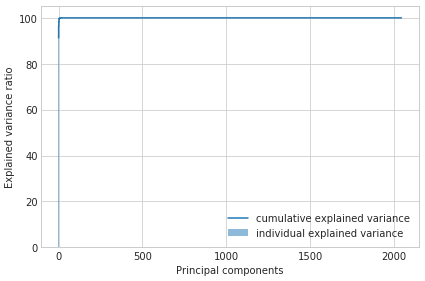

In [15]:
cov_mat = np.cov(X_std.T) #covariance matrix
#print('NumPy covariance matrix: \n%s' %np.cov(X_std.T))

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

#print('Eigenvectors \n%s' %eig_vecs)
#print('\nEigenvalues \n%s' %eig_vals)

tot = sum(eig_vals)
print(tot)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
#print(cum_var_exp.real)
print(np.round(cum_var_exp[:10].real, decimals=2)) # same as above but only first 10 elements

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(2046), var_exp, alpha=0.5, align='center', label='individual explained variance')
    plt.step(range(2046), cum_var_exp, where='mid', label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()
    
'''# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs[:20]: #only first 20 eigenvalues
    print(i[0])
'''

# Linear Regression
this is ordinary least square regression

In [40]:
from sklearn import linear_model

# fit a model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

In [41]:
b=np.append(y_test, predictions, axis=1)

print("[real, predictions]")
print(b)

[real, predictions]
[[ 0.18       -1.63366029]
 [ 0.16        0.01425414]
 [12.53        9.79716685]
 [ 8.75       12.06875914]
 [ 7.22        5.50446781]
 [ 3.          5.15970101]]


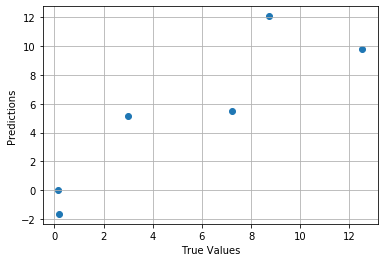

In [42]:
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.grid(True)
plt.show()

In [43]:
print ('Score: ', model.score(X_test, y_test))

Score:  0.7662648228590205


In [44]:
rmse = sqrt(mean_squared_error(y_test, predictions))
r2 = r2_score(y_test, predictions)
print("RMSE: ", rmse)
print("R^2: ", r2)

RMSE:  2.213613332519151
R^2:  0.7662648228590205


### Trial with scaled intensities

In [113]:
X_std = StandardScaler().fit_transform(x_df)
print(X_std.shape)
print(x_df.shape)

X_train1, X_test1, y_train1, y_test1 = train_test_split(X_std, df_y_si, test_size=0.2)

(28, 2046)
(28, 2046)


[real, predictions]
[[ 0.18        8.33675244]
 [ 0.16        8.05665743]
 [12.53        3.1371169 ]
 [ 8.75        8.58714643]
 [ 7.22        7.38096563]
 [ 3.          2.10417426]]
RMSE:  2.249866145654613
R^2:  0.7524993528346864


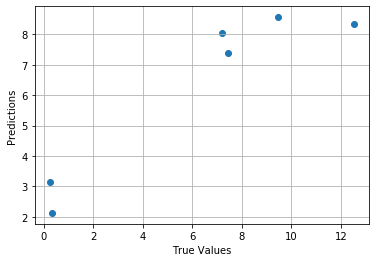

In [114]:
#Linear regression

lm = linear_model.LinearRegression()
model = lm.fit(X_train1, y_train1)
predictions = lm.predict(X_test1)

b=np.append(y_test, predictions, axis=1)

print("[real, predictions]")
print(b)

rmse = sqrt(mean_squared_error(y_test1, predictions))
r2 = r2_score(y_test1, predictions)
print("RMSE: ", rmse)
print("R^2: ", r2)

plt.scatter(y_test1, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.grid(True)
plt.show()

100% completed
Suggested number of components:  28



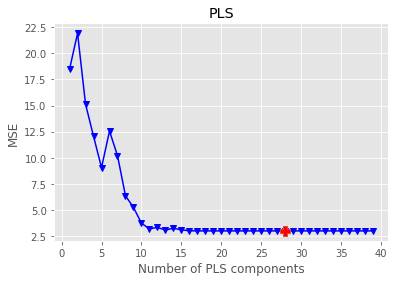

R2 calib: 1.000
R2 CV: 0.832
MSE calib: 0.000
MSE CV: 2.990


In [115]:
#Partial Least Square Regression

optimise_pls_cv(X_train1, y_train1, 40, plot_components=True)


In [117]:
# Define PLS object
pls = PLSRegression(n_components=28)

# Fit
pls.fit(X_train1, y_train1)
# Cross-validation
y_cv1 = cross_val_predict(pls, X_train1, y_train1, cv=10)

# Calculate scores
score = r2_score(y_train1, y_cv1)
mse = mean_squared_error(y_train1, y_cv1)
rmse = sqrt(mean_squared_error(y_train1, y_cv1))


print("R^2: ", score)
print("RMSE: ", rmse)

R^2:  0.8322253582626365
RMSE:  1.7292248750274852


In [118]:
y_pred = pls.predict(X_test1)

# Cross-validation
y_cv = cross_val_predict(pls, X_train1, y_train1, cv=10)

# Calculate scores for calibration and cross-validation
score_pred = r2_score(y_test1, y_pred)
score_cv = r2_score(y_train1, y_cv)

print(score_pred)
print(score_cv)

0.7506306661787598
0.8322253582626365


[real, predictions]
[[12.53        8.27839236]
 [ 7.22        7.86051725]
 [ 0.26        3.12209305]
 [ 9.46        8.45797108]
 [ 7.46        7.39177528]
 [ 0.36        2.06703658]]


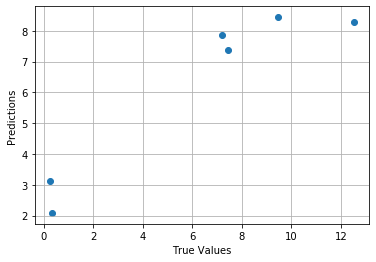

In [119]:
b=np.append(y_test1, y_pred, axis=1)

print("[real, predictions]")
print(b)

plt.scatter(y_test1, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.grid(True)
plt.show()

# Partial Least Square Regression

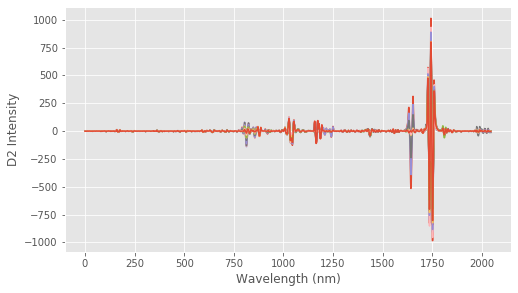

(22, 2046)
(22,)


In [137]:
# Calculate second derivative
X2 = savgol_filter(X_train, 17, polyorder = 2,deriv=2) # Is this useful with LIBS spectra???
# Plot second derivative
plt.figure(figsize=(8,4.5))
with plt.style.context(('ggplot')):
    plt.plot(range(len(X2.T)), X2.T)
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('D2 Intensity')
    plt.show()
    
print(X2.shape)
print(y_train.shape)

In [45]:
def optimise_pls_cv(X, y, n_comp, plot_components=True):
    '''Run PLS including a variable number of components, up to n_comp,
       and calculate MSE '''
    mse = []
    component = np.arange(1, n_comp)
    for i in component:
        pls = PLSRegression(n_components=i)
        # Cross-validation
        y_cv = cross_val_predict(pls, X, y, cv=10)
        mse.append(mean_squared_error(y, y_cv))
        comp = 100*(i+1)/40
        # Trick to update status on the same line
        stdout.write("\r%d%% completed" % comp)
        stdout.flush()
    stdout.write("\n")
    # Calculate and print the position of minimum in MSE
    msemin = np.argmin(mse)
    print("Suggested number of components: ", msemin+1)
    stdout.write("\n")
    if plot_components is True:
        with plt.style.context(('ggplot')):
            plt.plot(component, np.array(mse), '-v', color = 'blue', mfc='blue')
            plt.plot(component[msemin], np.array(mse)[msemin], 'P', ms=10, mfc='red')
            plt.xlabel('Number of PLS components')
            plt.ylabel('MSE')
            plt.title('PLS')
            plt.xlim(left=-1)
        plt.show()
    # Define PLS object with optimal number of components
    pls_opt = PLSRegression(n_components=msemin+1)
    # Fir to the entire dataset
    pls_opt.fit(X, y)
    y_c = pls_opt.predict(X)
    # Cross-validation
    y_cv = cross_val_predict(pls_opt, X, y, cv=10)
    # Calculate scores for calibration and cross-validation
    score_c = r2_score(y, y_c)
    score_cv = r2_score(y, y_cv)
    # Calculate mean squared error for calibration and cross validation
    mse_c = mean_squared_error(y, y_c)
    mse_cv = mean_squared_error(y, y_cv)
    print('R2 calib: %5.3f'  % score_c)
    print('R2 CV: %5.3f'  % score_cv)
    print('MSE calib: %5.3f' % mse_c)
    print('MSE CV: %5.3f' % mse_cv)
    
    return
    # Plot regression and figures of merit
    rangey = max(y) - min(y)
    rangex = max(y_c) - min(y_c)
"""   
    # Fit a line to the CV vs response
    z = np.polyfit(y, y_c, 1)
    with plt.style.context(('ggplot')):
        fig, ax = plt.subplots(figsize=(9, 5))
        ax.scatter(y_c, y, c='red', edgecolors='k')
        #Plot the best fit line
        ax.plot(np.polyval(z,y), y, c='blue', linewidth=1)
        #Plot the ideal 1:1 line
        ax.plot(y, y, color='green', linewidth=1)
        plt.title('$R^{2}$ (CV): '+str(score_cv))
        plt.xlabel('Predicted $^{\circ}$Brix')
        plt.ylabel('Measured $^{\circ}$Brix')
        plt.show()
    return
""" 

"   \n    # Fit a line to the CV vs response\n    z = np.polyfit(y, y_c, 1)\n    with plt.style.context(('ggplot')):\n        fig, ax = plt.subplots(figsize=(9, 5))\n        ax.scatter(y_c, y, c='red', edgecolors='k')\n        #Plot the best fit line\n        ax.plot(np.polyval(z,y), y, c='blue', linewidth=1)\n        #Plot the ideal 1:1 line\n        ax.plot(y, y, color='green', linewidth=1)\n        plt.title('$R^{2}$ (CV): '+str(score_cv))\n        plt.xlabel('Predicted $^{\\circ}$Brix')\n        plt.ylabel('Measured $^{\\circ}$Brix')\n        plt.show()\n    return\n"

100% completed
Suggested number of components:  4



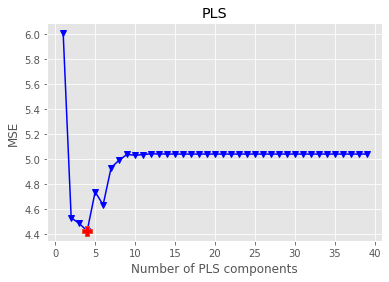

R2 calib: 0.988
R2 CV: 0.762
MSE calib: 0.229
MSE CV: 4.424


In [139]:
optimise_pls_cv(X2, y_train, 40, plot_components=True)

In [144]:
# Define PLS object
pls = PLSRegression(n_components=4)
# Fit
pls.fit(X2, y_train)
# Cross-validation
y_cv = cross_val_predict(pls, X2, y_train, cv=10)
# Calculate scores
score = r2_score(y_train, y_cv)
mse = mean_squared_error(y_train, y_cv)

print("Score: ", score)
print("MSE: ", mse)

Score:  0.7619441953917465
MSE:  4.424253012525399


In [145]:
y_pred = pls.predict(X_test)

# Cross-validation
y_cv = cross_val_predict(pls, X_train, y_train, cv=10)

# Calculate scores for calibration and cross-validation
score_pred = r2_score(y_test, y_pred)
score_cv = r2_score(y_train, y_cv)

print(score_pred)
print(score_cv)

-2025420.2744864954
0.6315946934065088


In [146]:
b=np.append(y_test, y_pred, axis=1)

print("[real, predictions]")
print(b)

[real, predictions]
[[1.80000000e-01 6.80174127e+03]
 [1.60000000e-01 6.52506713e+03]
 [1.25300000e+01 6.35280295e+03]
 [8.75000000e+00 6.23202597e+03]
 [7.22000000e+00 7.52017585e+03]
 [3.00000000e+00 5.53113857e+03]]


100% completed
Suggested number of components:  10



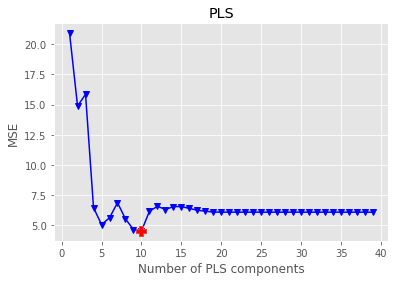

R2 calib: 0.974
R2 CV: 0.767
MSE calib: 0.495
MSE CV: 4.516


In [46]:
optimise_pls_cv(x_df,df_y_si, 40, plot_components=True)

100% completed
Suggested number of components:  13



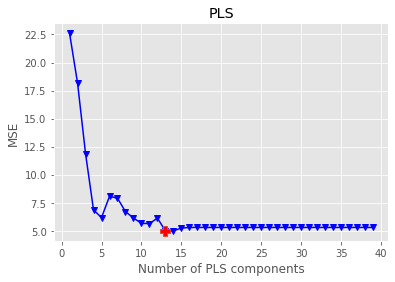

R2 calib: 0.998
R2 CV: 0.732
MSE calib: 0.031
MSE CV: 4.980


In [47]:
optimise_pls_cv(X_train,y_train, 40, plot_components=True)

In [48]:
# Define PLS object
pls = PLSRegression(n_components=13)
# Fit
pls.fit(X_train, y_train)
# Cross-validation
y_cv = cross_val_predict(pls, X_train, y_train, cv=10)
# Calculate scores
score = r2_score(y_train, y_cv)
mse = mean_squared_error(y_train, y_cv)

print("Score: ", score)
print("MSE: ", mse)

In [147]:
X2_t = savgol_filter(X_test, 17, polyorder = 2,deriv=2)

y_pred = pls.predict(X2_t)

# Cross-validation
y_cv = cross_val_predict(pls, X_train, y_train, cv=10)

# Calculate scores for calibration and cross-validation
score_pred = r2_score(y_test, y_pred)
score_cv = r2_score(y_train, y_cv)

print(score_pred)
print(score_cv)

0.3885387827824214
0.6315946934065088


In [51]:
b=np.append(y_test, y_pred, axis=1)

print("[real, predictions]")
print(b)

[real, predictions]
[[ 1.80000000e-01 -1.50477579e+00]
 [ 1.60000000e-01  2.64212552e-03]
 [ 1.25300000e+01  9.12308488e+00]
 [ 8.75000000e+00  1.24690887e+01]
 [ 7.22000000e+00  5.21300074e+00]
 [ 3.00000000e+00  6.21167860e+00]]


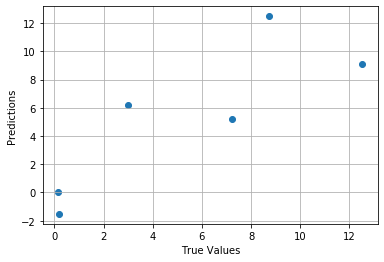

In [52]:
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.grid(True)
plt.show()

# Elastic Net

In [53]:
from sklearn.linear_model import ElasticNet,ElasticNetCV

In [54]:
alphas = [0.0001, 0.001, 0.01, 0.1, 0.3, 0.5, 0.7, 1]

In [55]:
for a in alphas:
    model = ElasticNet(alpha=a).fit(X_train,y_train)   
    score = model.score(X_train, y_train)
    pred_y = model.predict(X_test)
    mse = mean_squared_error(y_test, pred_y)   
    print("Alpha:{0:.4f}, R2:{1:.2f}, MSE:{2:.2f}, RMSE:{3:.2f}".format(a, score, mse, np.sqrt(mse)))

Alpha:0.0001, R2:1.00, MSE:7.76, RMSE:2.78
Alpha:0.0010, R2:1.00, MSE:7.76, RMSE:2.79
Alpha:0.0100, R2:1.00, MSE:7.76, RMSE:2.79
Alpha:0.1000, R2:1.00, MSE:7.69, RMSE:2.77
Alpha:0.3000, R2:1.00, MSE:7.54, RMSE:2.75
Alpha:0.5000, R2:1.00, MSE:7.11, RMSE:2.67
Alpha:0.7000, R2:1.00, MSE:6.66, RMSE:2.58
Alpha:1.0000, R2:1.00, MSE:6.19, RMSE:2.49


In [56]:
model = ElasticNet(alpha=0.01).fit(X_train,y_train)   
score = model.score(X_train, y_train)
print("Train score: ", score)
pred_y = model.predict(X_test)


rmse = sqrt(mean_squared_error(y_test, pred_y))
r2 = r2_score(y_test, pred_y)
print("RMSE: ", rmse)
print("R^2: ", r2)

Train score:  0.9999995539365062
RMSE:  2.7863698132263677
R^2:  0.6296621782974923


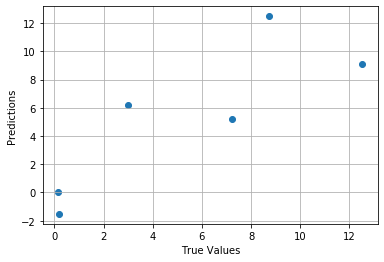

In [57]:
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.grid(True)
plt.show()

# Random Forest

In [58]:
y_test=np.ravel(y_test)
print(y_test.shape)
y_train=np.ravel(y_train)
print(y_train.shape)

(6,)
(22,)


In [77]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 600, random_state = 42)
# Train the model on training data
rf.fit(X_train, y_train);

In [78]:
# Use the forest's predict method on the test data
predictions = rf.predict(X_test)
# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2))

Mean Absolute Error: 4.53


In [79]:
rmse = sqrt(mean_squared_error(y_test, predictions))
r2 = r2_score(y_test, predictions)
print("RMSE: ", rmse)
print("R^2: ", r2)

RMSE:  4.245937094523209
R^2:  0.1400609593374874


In [80]:
y_test= y_test.reshape((len(y_test), 1))
print(y_test.shape)
print(type(y_test))
predictions=predictions.reshape((len(y_test), 1))
print(predictions.shape)
print(type(y_test))
#print((y_test, predictions))

(6, 1)
<class 'numpy.ndarray'>
(6, 1)
<class 'numpy.ndarray'>


In [81]:
b=np.append(y_test, predictions, axis=1)

print("[real, predictions]")
print(b)

[real, predictions]
[[ 0.18        1.08260833]
 [ 0.16        1.04025833]
 [12.53        6.84240833]
 [ 8.75        2.45188333]
 [ 7.22        1.373275  ]
 [ 3.          3.61576667]]


Text(0, 0.5, 'Predictions')

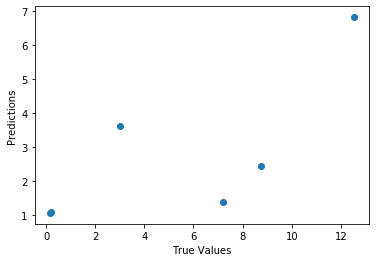

In [82]:
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')

In [102]:
#I don't remember what's this

#X_train = normalize(X_train, axis=1)
#X_test = normalize(X_test, axis=1)

# MultiOutput Random Forest

In [139]:
multi_y = concentration[:,2:]
#print (multi_y)
print (type(multi_y))
df_y= pd.DataFrame(multi_y)
print (type(df_y))

<class 'numpy.ndarray'>
<class 'pandas.core.frame.DataFrame'>


In [140]:
X_train, X_test, y_train, y_test = train_test_split(x_df, df_y, test_size=0.2)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)
#print(X_test)

(47, 4094) (47, 7)
(12, 4094) (12, 7)


In [141]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor

max_depth = 30
regr_multirf = MultiOutputRegressor(RandomForestRegressor(n_estimators=150,
                                                          max_depth=max_depth,
                                                          random_state=0))
regr_multirf.fit(X_train, y_train)


MultiOutputRegressor(estimator=RandomForestRegressor(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     criterion='mse',
                                                     max_depth=30,
                                                     max_features='auto',
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                                     n_estimators=150,
                                                

In [142]:
y_multirf = regr_multirf.predict(X_test)

In [143]:
print(y_test.shape)
print(y_multirf.shape)

(12, 7)
(12, 7)


In [144]:
rmse = sqrt(mean_squared_error(y_test, y_multirf))
r2 = r2_score(y_test, y_multirf)

print("R^2: ", r2)
print("RMSE: ", rmse)

R^2:  0.9081471005969817
RMSE:  0.09092271675402586


In [145]:
b=np.append(np.around(y_test,3), np.around(y_multirf,3), axis=1)

print("[real, predictions]")
print(b)

[real, predictions]
[[1.8 0.17 0.48 0.37 0.022000000000000002 0.17300000000000001 0.0017 1.69
  0.175 0.508 0.282 0.022 0.232 0.002]
 [2.53 0.13 0.13 0.09300000000000001 0.024 0.012 0.033 2.505 0.127 0.135
  0.139 0.024 0.012 0.035]
 [4.4 0.2 0.14 0.053 0.022000000000000002 0.012 0.0468 3.652 0.178 0.177
  0.07 0.022 0.014 0.047]
 [2.54 0.16 1.13 0.095 0.027000000000000003 0.027000000000000003 0.0568
  2.54 0.171 1.111 0.139 0.026 0.022 0.054]
 [1.59 0.14 0.32 0.06 0.024 0.016 0.001 1.563 0.134 0.256 0.085 0.023
  0.015 0.002]
 [1.5 0.12 0.09 0.04 0.021 0.009000000000000001 0.0009 1.572 0.138 0.231
  0.061 0.022 0.016 0.003]
 [2.49 0.12 0.13 0.11 0.024 0.012 0.036000000000000004 2.522 0.129 0.138
  0.102 0.024 0.013 0.042]
 [2.48 0.12 0.13 0.052000000000000005 0.024 0.012 0.03 2.531 0.134 0.194
  0.1 0.024 0.03 0.044]
 [2.39 0.2 0.65 1.1 0.021 0.267 0.0542 2.426 0.191 0.631 0.987 0.022
  0.266 0.048]
 [1.5 0.12 0.09 0.04 0.021 0.009000000000000001 0.0009 1.558 0.151 0.267
  0.062 0.022

Text(0, 0.5, 'Predictions')

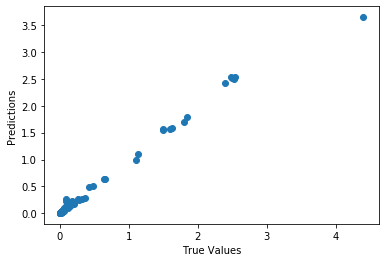

In [146]:
plt.scatter(y_test, y_multirf)
plt.xlabel('True Values')
plt.ylabel('Predictions')

In [151]:
b=np.append(y_test[0,:],y_multirf[0,:], axis=1)

print("[real, predictions]")
print(b)

TypeError: '(0, slice(None, None, None))' is an invalid key

In [164]:
print(y_test[0]shape)
print(y_multirf[0].T.shape)

(12,)
(7,)


In [184]:
y_pred=np.around(y_multirf,2)
y_pred[:,0]

array([1.69, 2.51, 3.65, 2.54, 1.56, 1.57, 2.52, 2.53, 2.43, 1.56, 1.8 ,
       1.58])

In [185]:
y_test[0].values

array([1.8, 2.53, 4.4, 2.54, 1.59, 1.5, 2.49, 2.48, 2.39, 1.5, 1.84, 1.63],
      dtype=object)

In [186]:
print("real: ", y_test[0].values)
print("pred: ", y_pred[:,0])

real:  [1.8 2.53 4.4 2.54 1.59 1.5 2.49 2.48 2.39 1.5 1.84 1.63]
pred:  [1.69 2.51 3.65 2.54 1.56 1.57 2.52 2.53 2.43 1.56 1.8  1.58]
